#TRABAJO FINAL DE BIG DATA
*Micaela Maldonado Otazo y Zileidy Argüello Barreto*

# Componente 1: Data Fetching
Obtención de una lista de las últimas menciones de un handle o hashtag en Twitter a través de su API. 

Este programa en Python deberá luego guardar los tweets en un archivo .csv para su posterior análisis.

El archivo de salida deberá contener mínimamente:
* Texto del tweet
* Autor
* Timestamp
* Número de Favs
* Número de RTs

**Configuracion | Preparacion de keys and tokens**

In [1]:
#Instalar librerias necesarias
!pip install tweepy
!pip install emoji

In [2]:
#Importar librerias necesarias
import tweepy
import datetime
import pandas as pd

In [3]:
#Keys y tokens
consumerKey = 'xM7AQuh8llzpJG7AJFdAguyQK'
consumerSecret = '4KlatIHVig7V2utrjjRzFqQ7tFJjcWSIWJyn0B0tDcUed15sBI'
accessToken = '1389193213899153410-PhJBp5A8CmBIdCsvIyl2i4y6kNWmnp'
accessTokenSecret= 'vb7suuIljW8LYdw9kGJE4dWR7Pb4TpSlYHMGhpac3gGln'

In [4]:
#Proceso OAuth process | Autenticacion 
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

**Trabajo con los Tweets**

*Palabra clave:* "#CocaCola"

*Cantidad:* 500 

*Lenguaje:* Inglés


In [5]:
#Buscar tweets
lista_tweets = tweepy.Cursor(api.search, q="#CocaCola", tweet_mode='extended', lang='en').items(500)

In [6]:
#Recorrer a través de tweets extraidos
dataFrame = [] #Lista que recolecta todos los tweets
for x in lista_tweets:
  texto = x._json['full_text'] #Extraer contenido Tweet
  fecha = x._json['created_at'] #Extraer fecha de posteo
  autor = x.user.name #Extraer nombre del autor
  userName = x.user.screen_name #Extraer el nombre de usuario
  localizacion = x.user.location #Extraer la localizacion del tweet
  retweets = x._json['retweet_count'] #Extraer cant. de retweets
  favoritos =  x._json['favorite_count'] #Extraer cant. de favs

  #Enviar a una lista
  lista = {'Contenido': texto, 'Autor': autor, 'User_Name': userName, 'Fecha_Posteo': fecha, 'Favs': favoritos, 'Rt': retweets, 'Localizacion': localizacion}
  #Agregar cada tweets a lista principal
  dataFrame.append(lista)

In [7]:
#Convertir a DataFrame
df = pd.DataFrame(dataFrame)

#Descargar datos scrapeados en formato .csv
df.to_csv('tweets_coca_cola.csv', index=False, encoding='utf-8')



---



# Componente 2: Data analysis
La siguiente fase del trabajo práctico final de big data consiste en analizar los tweets descargados como parte del componente 1. 

* Análisis de sentimiento en la nube
* Cálculo el sentimiento de cada tweet 
* Descarga en .cvs
* Sentimiento promedio relacionado a las menciones.



**Subida de archivo descargado**

In [8]:
#Si el dataset anterior se descarga en el disco, usar esto para subir
# from google.colab import files
# uploaded = files.upload()

#Leer el archivo
tweets_extraidos = pd.read_csv("tweets_coca_cola.csv", sep=',')

#Mostrar
tweets_extraidos.style.hide_index()

Contenido,Autor,User_Name,Fecha_Posteo,Favs,Rt,Localizacion
How cool is this? Circa late 1960’s #cocacola https://t.co/YQuFwr9AxD,Sheldon Haygood,SheldonFox6,Fri Jun 25 02:29:41 +0000 2021,0,0,nan
RT @simplyshay: Check out Vintage Coca Cola Things Go Better With Coke Set of 4 Glasses Libbey 1960 1969 #CocaCola https://t.co/FZL6D8Rmhi…,Robin Vergason,AntiqTreasTrove,Fri Jun 25 02:23:38 +0000 2021,0,2,nan
"Commercial I did for Coca-Cola a few years ago @cocacolaquebec @cocacola @cocacola_ca #moojen #coke #cocacola #moojen9 #montreal #quebec @ Montreal, Quebec https://t.co/MFoEJbMmSH",Frederico Moojen,FredMoojen,Fri Jun 25 02:02:39 +0000 2021,3,0,nan
"RT @rolandsmartin: 🚨 #Throwback Alert 🚨 Olympic gold medalist @CullenJones Fam, it's the final countdown to the 2021 #EssenceFest of Cultur…",C.B 162,BetterWorld162,Fri Jun 25 01:52:55 +0000 2021,0,1,nan
"🚨 #Throwback Alert 🚨 Olympic gold medalist @CullenJones Fam, it's the final countdown to the 2021 #EssenceFest of Culture “Live Loud” Virtual Experience Presented by #CocaCola! WATCH LIVE on https://t.co/SQ675jG90n June 25-27 & July 2-4. #cocacola #BlackLove #blackexcellence https://t.co/yyLECGBBpj",rolandsmartin,rolandsmartin,Fri Jun 25 01:51:07 +0000 2021,7,1,"Washington, D.C."
"RT @CottageCindy: Check out Vtg. 1973 Coca Cola Serving Tray Flapper Girl 1925 Coke Advertisement 13"" x 10"" https://t.co/V4A8PZOt45 via @e…",SharonANDRenee,BohemianBound,Fri Jun 25 01:23:26 +0000 2021,0,16,"Palm Harbor, FL"
"RT @CottageCindy: Check out Vtg. 1973 Coca Cola Serving Tray Flapper Girl 1925 Coke Advertisement 13"" x 10"" https://t.co/V4A8PZOt45 via @e…",Bitchin Retro,RetroCEO,Fri Jun 25 01:22:37 +0000 2021,0,16,"Bitchintown, USA"
RT @news_ntd: A group of #CocaCola shareholders is threatening legal action over the company’s diversity policy. They say the policy might…,OilyCentric,TracyJ23sMom,Fri Jun 25 01:19:27 +0000 2021,0,12,"Michigan, USA"
Man it's always nice when you go to sporting events that serve the correct beverage of choice @CocaCola! #CocaCola #openhappiness,Tommy,tommy_cubillas,Fri Jun 25 01:16:22 +0000 2021,0,0,Disneyland Resort
RT @RebeccaH2030: #CocaCola lost $4 billion in market value after soccer star @Cristiano Ronaldo suggested people drink water instead. #Ti…,Er.Praveen Yadav अभि.प्रवीण यादव🇮🇳,ErPraveenYadav_,Fri Jun 25 01:06:46 +0000 2021,0,32,SUPAUL PATNA BIHAR


**Analisis de sentimiento - Con Vader**

In [9]:
#Descargar e importar librerias necesarias
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
#Procesar y realizar analisis
analyzer = SentimentIntensityAnalyzer()

#Crear columnas para ver los scores
tweets_extraidos['compound'] = tweets_extraidos['Contenido'].apply(lambda Contenido: analyzer.polarity_scores(Contenido)).apply(lambda score_dict: score_dict['compound'])
tweets_extraidos['pos_score'] = tweets_extraidos['Contenido'].apply(lambda Contenido: analyzer.polarity_scores(Contenido)).apply(lambda score_dict: score_dict['pos'])
tweets_extraidos['neg_score'] = tweets_extraidos['Contenido'].apply(lambda Contenido: analyzer.polarity_scores(Contenido)).apply(lambda score_dict: score_dict['neg'])
tweets_extraidos['neu_score'] = tweets_extraidos['Contenido'].apply(lambda Contenido: analyzer.polarity_scores(Contenido)).apply(lambda score_dict: score_dict['neu'])

#Segun nro de compund, categorizar sentimientos
tweets_extraidos.loc[tweets_extraidos.compound>0,'Tipo_Sentimiento']='POSITIVO'
tweets_extraidos.loc[tweets_extraidos.compound==0,'Tipo_Sentimiento']='NEUTRO'
tweets_extraidos.loc[tweets_extraidos.compound<0,'Tipo_Sentimiento']='NEGATIVO'

#Mostrar dataframe actualizado
tweets_extraidos.style.hide_index()

Contenido,Autor,User_Name,Fecha_Posteo,Favs,Rt,Localizacion,compound,pos_score,neg_score,neu_score,Tipo_Sentimiento
How cool is this? Circa late 1960’s #cocacola https://t.co/YQuFwr9AxD,Sheldon Haygood,SheldonFox6,Fri Jun 25 02:29:41 +0000 2021,0,0,nan,0.318200,0.223000,0.000000,0.777000,POSITIVO
RT @simplyshay: Check out Vintage Coca Cola Things Go Better With Coke Set of 4 Glasses Libbey 1960 1969 #CocaCola https://t.co/FZL6D8Rmhi…,Robin Vergason,AntiqTreasTrove,Fri Jun 25 02:23:38 +0000 2021,0,2,nan,0.440400,0.132000,0.000000,0.868000,POSITIVO
"Commercial I did for Coca-Cola a few years ago @cocacolaquebec @cocacola @cocacola_ca #moojen #coke #cocacola #moojen9 #montreal #quebec @ Montreal, Quebec https://t.co/MFoEJbMmSH",Frederico Moojen,FredMoojen,Fri Jun 25 02:02:39 +0000 2021,3,0,nan,0.000000,0.000000,0.000000,1.000000,NEUTRO
"RT @rolandsmartin: 🚨 #Throwback Alert 🚨 Olympic gold medalist @CullenJones Fam, it's the final countdown to the 2021 #EssenceFest of Cultur…",C.B 162,BetterWorld162,Fri Jun 25 01:52:55 +0000 2021,0,1,nan,0.296000,0.109000,0.000000,0.891000,POSITIVO
"🚨 #Throwback Alert 🚨 Olympic gold medalist @CullenJones Fam, it's the final countdown to the 2021 #EssenceFest of Culture “Live Loud” Virtual Experience Presented by #CocaCola! WATCH LIVE on https://t.co/SQ675jG90n June 25-27 & July 2-4. #cocacola #BlackLove #blackexcellence https://t.co/yyLECGBBpj",rolandsmartin,rolandsmartin,Fri Jun 25 01:51:07 +0000 2021,7,1,"Washington, D.C.",0.359500,0.065000,0.000000,0.935000,POSITIVO
"RT @CottageCindy: Check out Vtg. 1973 Coca Cola Serving Tray Flapper Girl 1925 Coke Advertisement 13"" x 10"" https://t.co/V4A8PZOt45 via @e…",SharonANDRenee,BohemianBound,Fri Jun 25 01:23:26 +0000 2021,0,16,"Palm Harbor, FL",0.000000,0.000000,0.000000,1.000000,NEUTRO
"RT @CottageCindy: Check out Vtg. 1973 Coca Cola Serving Tray Flapper Girl 1925 Coke Advertisement 13"" x 10"" https://t.co/V4A8PZOt45 via @e…",Bitchin Retro,RetroCEO,Fri Jun 25 01:22:37 +0000 2021,0,16,"Bitchintown, USA",0.000000,0.000000,0.000000,1.000000,NEUTRO
RT @news_ntd: A group of #CocaCola shareholders is threatening legal action over the company’s diversity policy. They say the policy might…,OilyCentric,TracyJ23sMom,Fri Jun 25 01:19:27 +0000 2021,0,12,"Michigan, USA",-0.440400,0.066000,0.148000,0.786000,NEGATIVO
Man it's always nice when you go to sporting events that serve the correct beverage of choice @CocaCola! #CocaCola #openhappiness,Tommy,tommy_cubillas,Fri Jun 25 01:16:22 +0000 2021,0,0,Disneyland Resort,0.475300,0.140000,0.000000,0.860000,POSITIVO
RT @RebeccaH2030: #CocaCola lost $4 billion in market value after soccer star @Cristiano Ronaldo suggested people drink water instead. #Ti…,Er.Praveen Yadav अभि.प्रवीण यादव🇮🇳,ErPraveenYadav_,Fri Jun 25 01:06:46 +0000 2021,0,32,SUPAUL PATNA BIHAR,0.025800,0.106000,0.101000,0.793000,POSITIVO


**Evaluación de resultados**

In [11]:
#Determinar cantidad de tweets por sentimientos
tweets_extraidos['Tipo_Sentimiento'].value_counts()

POSITIVO    177
NEGATIVO    165
NEUTRO      158
Name: Tipo_Sentimiento, dtype: int64

In [12]:
#Determinar porcentajes
positivo = tweets_extraidos[tweets_extraidos.Tipo_Sentimiento == 'POSITIVO']
positivo = positivo['Contenido']
porcentaje_positivo = round((positivo.shape[0] / tweets_extraidos.shape[0]) * 100, 1)

negativo = tweets_extraidos[tweets_extraidos.Tipo_Sentimiento == 'NEGATIVO']
negativo = negativo['Contenido']
porcentaje_negativo = round((negativo.shape[0] / tweets_extraidos.shape[0]) * 100, 1)

neutro = tweets_extraidos[tweets_extraidos.Tipo_Sentimiento == 'NEUTRO']
neutro = neutro['Contenido']
porcentaje_neutral =  round((neutro.shape[0] / tweets_extraidos.shape[0]) * 100, 1)

In [13]:
print("Porcentaje Positivo:", porcentaje_positivo)

Porcentaje Positivo: 35.4


In [14]:
print("Porcentaje Negativo:", porcentaje_negativo)

Porcentaje Negativo: 33.0


In [15]:
print("Porcentaje Neutral:", porcentaje_neutral)

Porcentaje Neutral: 31.6


**Gráficos comparativos de sentimientos**

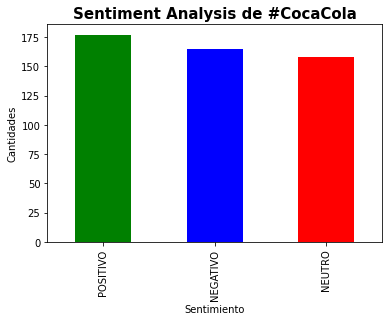

In [16]:
#Importar librerias necesarias
from itertools import cycle, islice 
import matplotlib.pyplot as plt

#Establecer grafico
plt.title('Sentiment Analysis de #CocaCola', fontsize=15, fontweight='bold')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidades')
colores = list(islice(cycle(['g', 'b', 'r']), None, len(tweets_extraidos))) 

#Grafido de barras para comparar cantidad de sentimientos
tweets_extraidos['Tipo_Sentimiento'].value_counts().plot(kind = 'bar', color = colores)

plt.show()

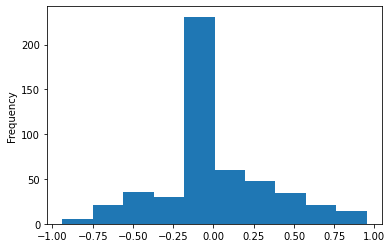

In [17]:
#Histograma || Grafico para observar frecuencia del compound de tweets
tweets_extraidos['compound'].plot.hist()
plt.show()

**Limpieza del contenido**


*   Eliminacion de caracteres especiales
*   Eliminacion de palabras innecesarias (RT)
*   Eliminacion de emojis



In [18]:
#Importar modulos necesarios
import numpy as np
import re
import emoji

In [19]:
#Funcion para limpieza de tweets

#Eliminar la puntuacion
import string 
#Importante saber: string.punctuation = Cadena de caracteres ASCII que se consideran caracteres de puntuación en la configuración regional 
                    #C: !" #$%&'()*+,-./:;<=>?@[\]^_`{|} ~.

def eliminar_puntuaciones(tweet):
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet) #Eliminar @
    tweet = re.sub('RT[\s]+', '', tweet) # Eliminar palabra RT
    tweet = re.sub('https?:\/\/\S+', '', tweet) # Eiminar links
    tweet  = "".join([char for char in tweet if char not in string.punctuation]) #Eliminar puntuaciones
    tweet = re.sub('[0-9]+', '', tweet)  #Eliminar numeros
    tweet = re.sub('\n\n', '', tweet) #Eliminar \n
    tweet = re.sub(emoji.get_emoji_regexp(),r'', tweet) #Eliminar emojis

    return tweet

#Limpiar el DataFrame de Tweets
tweets_extraidos['Contenido'] = tweets_extraidos['Contenido'].apply(eliminar_puntuaciones)

#Mostrar
# tweets_extraidos.style.hide_index()

In [20]:
#Funcion para limpieza de autores
def limpieza_autores(tweet):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    
    tweet = re.sub('#', '', tweet) # Eliminar #
    tweet = re.sub('_', '', tweet) # Eliminar _ 

    return re.sub(emoj, '', tweet)

#Limpiar el DataFrame de Autores
tweets_extraidos['Autor'] = tweets_extraidos['Autor'].apply(limpieza_autores)

#Mostrar
# tweets_extraidos.style.hide_index()

**Limpieza de datos II - Extracción de stopwords**

In [21]:
#Instalar librerias necesarias
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#Importar librerias necesarias 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
#Eliminar stopwords
text = ' '.join([tweet for tweet in tweets_extraidos['Contenido']])
stopWords = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
tweets_sin_stopwords = [word for word in word_tokens if not word.lower() in stopWords]
 
# print(tweets_sin_stopwords)

In [24]:
#Descargar archivo .csv
tweets_extraidos.to_csv('tweets_coca_cola_con_sentimiento.csv', index=False, encoding='utf-8')

**Creacion de WordCloud**

In [25]:
#Importar librerias necesarias
from wordcloud import WordCloud

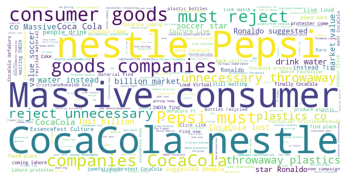

In [26]:
#Crear word cloud - General
words_word_cloud = ' '.join([filt for filt in tweets_sin_stopwords])

word_cloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110, background_color="white").generate(words_word_cloud)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

**Otros gráficos que permiten ver la frecuencia de palabras negativas y positivas de los tweets**

In [27]:
#Eliminar Stopwords en el mismo Dataframe
stopWords = set(stopwords.words('english'))

def stop_words_replace(dataframe):
    for word in stopWords:
        token = ' ' + word + ' '
        dataframe = dataframe.replace(token, ' ')
    return dataframe

df_sin_stopwords = pd.DataFrame()
df_sin_stopwords['Content_Sin_Stopwords'] = tweets_extraidos.Contenido.apply(lambda dataframe: stop_words_replace(dataframe))

In [28]:
#Matriz de recuento de tokens
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df_sin_stopwords['Content_Sin_Stopwords'])

#Ver longitud de cvec
len(cvec.get_feature_names())

1609

In [29]:
#Crear un nuevo DataFrame con el valor de compound como "target"
new_dataframe = pd.DataFrame(df_sin_stopwords,columns=['Content_Sin_Stopwords'])
new_dataframe['target'] = tweets_extraidos.compound
new_dataframe.head()

,Content_Sin_Stopwords,target
0,How cool Circa late ’s cocacola,0.3182
1,Check Vintage Coca Cola Things Go Better With...,0.4404
2,Commercial I CocaCola years ago ca moojen co...,0.0000
3,Throwback Alert Olympic gold medalist Fam ...,0.2960
4,Throwback Alert Olympic gold medalist Fam f...,0.3595


In [30]:
#Determinar positivos y negativos segun target (compund inicialmente)
neg_matrix = cvec.transform(new_dataframe[new_dataframe.target < 0.0].Content_Sin_Stopwords)
pos_matrix = cvec.transform(new_dataframe[new_dataframe.target > 0.0].Content_Sin_Stopwords)

#Suma de los targets por sentimiento
suma_neg = np.sum(neg_matrix,axis=0)
suma_pos = np.sum(pos_matrix,axis=0)

neg = np.squeeze(np.asarray(suma_neg))
pos = np.squeeze(np.asarray(suma_pos))

#Construir dataframe con frecuencia de terminos
frecuencia_terminos = pd.DataFrame([neg,pos], columns=cvec.get_feature_names()).transpose()

document_matrix = cvec.transform(new_dataframe.Content_Sin_Stopwords)
new_dataframe[new_dataframe.target > 0].head()

,Content_Sin_Stopwords,target
0,How cool Circa late ’s cocacola,0.3182
1,Check Vintage Coca Cola Things Go Better With...,0.4404
3,Throwback Alert Olympic gold medalist Fam ...,0.2960
4,Throwback Alert Olympic gold medalist Fam f...,0.3595
8,Man always nice go sporting events serve corre...,0.4753


In [31]:
%%time
neg_batches = np.linspace(-999999,0,10000).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    i += 1

CPU times: user 1.06 s, sys: 88.9 ms, total: 1.15 s
Wall time: 1.15 s


In [32]:
%%time
pos_batches = np.linspace(0,999999,10000).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    i += 1

CPU times: user 1.09 s, sys: 83.6 ms, total: 1.17 s
Wall time: 1.17 s


In [33]:
#Establecer frecuencia por termino
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
frecuencia_terminos = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
frecuencia_terminos.head()

,0,1
ab,1,1
abcnews,1,1
able,0,1
about,1,1
absolute,2,2


In [34]:
#Mostrar terminos
# cvec.get_feature_names()

In [35]:
#Arreglar dataframe y colocar el total
frecuencia_terminos.columns = ['negative', 'positive']
frecuencia_terminos['total'] = frecuencia_terminos['negative'] + frecuencia_terminos['positive']
frecuencia_terminos.sort_values(by='total', ascending=False).iloc[:10] #iloc: pedir las primeros 10 filas

,negative,positive,total
cocacola,383,471,854
like,79,87,166
ronaldo,74,90,164
pepsi,78,78,156
companies,72,72,144
plastics,71,72,143
must,71,72,143
nestle,71,71,142
goods,70,70,140
reject,70,70,140


Text(0.5, 1.0, 'Top 50 de palabras negativas en los tweets')

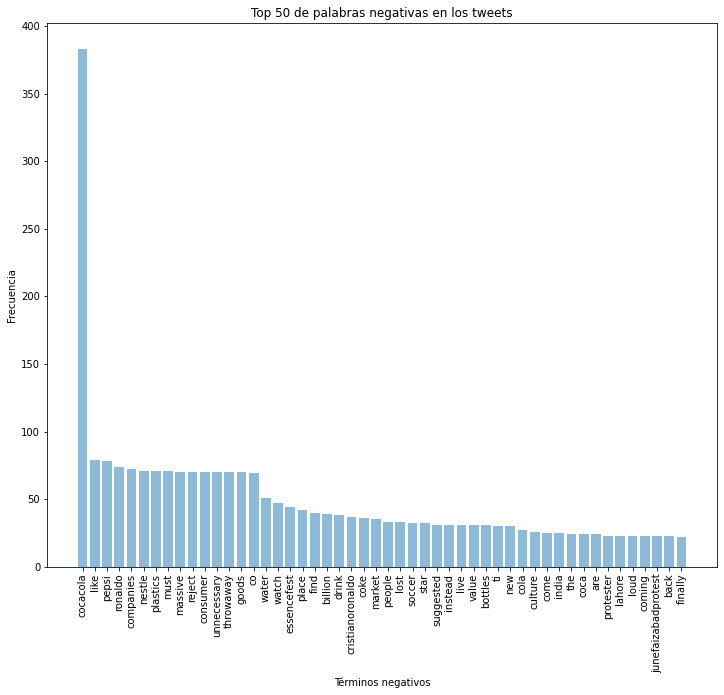

In [36]:
#Establecer datos y mostrar grafico de palabras negativas y sus frecuencias
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, frecuencia_terminos.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, frecuencia_terminos.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frecuencia')
plt.xlabel('Términos negativos')
plt.title('Top 50 de palabras negativas en los tweets')

In [37]:
# frecuencia_terminos.sort_values(by='negative')

Text(0.5, 1.0, 'Top 50 de palabras positivas en los tweets')

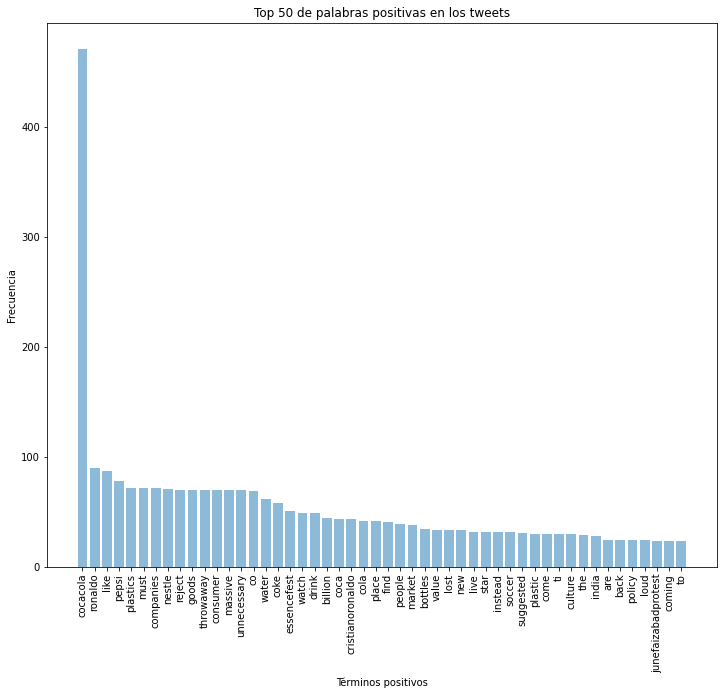

In [38]:
#Establecer datos y mostrar grafico de palabras negativas y sus frecuencias
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, frecuencia_terminos.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, frecuencia_terminos.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frecuencia')
plt.xlabel('Términos positivos')
plt.title('Top 50 de palabras positivas en los tweets')

**Grafico comparativo de 10 palabras positivas y negativas**

In [39]:
#Establecer 10 valores
lista_pos = frecuencia_terminos.sort_values(by='positive', ascending=False)['positive'][:10]
lista_neg = frecuencia_terminos.sort_values(by='negative', ascending=False)['positive'][:10]
lista_names =frecuencia_terminos.sort_values(by='total', ascending=False)['positive'][:10].index


In [40]:
lista_pos

cocacola     471
ronaldo       90
like          87
pepsi         78
plastics      72
must          72
companies     72
nestle        71
reject        70
goods         70
Name: positive, dtype: int64

In [41]:
lista_neg

cocacola     471
like          87
pepsi         78
ronaldo       90
companies     72
nestle        71
plastics      72
must          72
massive       70
reject        70
Name: positive, dtype: int64

In [42]:
lista_names

Index(['cocacola', 'like', 'ronaldo', 'pepsi', 'companies', 'plastics', 'must',
       'nestle', 'goods', 'reject'],
      dtype='object')

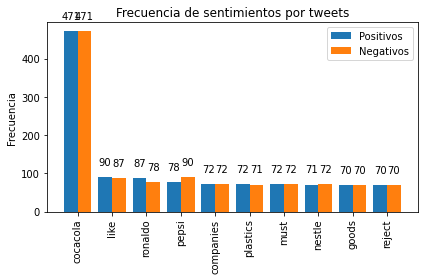

In [43]:
#Grafico
cantidad = 10

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(cantidad)
#tamaño de cada barra
width = 0.40

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, lista_pos, width, label='Positivos')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, lista_neg, width, label='Negativos')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de sentimientos por tweets')
ax.set_xticks(x)
ax.set_xticklabels(lista_names, rotation='vertical')

#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
#Mostramos la grafica con el metodo show()
plt.show()

**Cálculo de la media de sentimientos**

In [44]:
#Frecuencia relativa de los sentimientos 
tweets_extraidos['Tipo_Sentimiento'].value_counts()/500

POSITIVO    0.354
NEGATIVO    0.330
NEUTRO      0.316
Name: Tipo_Sentimiento, dtype: float64

In [45]:
#Media de sentimientos según sentimientos
tweets_extraidos.groupby('Tipo_Sentimiento').mean()

,Favs,Rt,compound,pos_score,neg_score,neu_score
Tipo_Sentimiento,,,,,,
NEGATIVO,0.860606,44.672727,-0.284095,0.059479,0.153285,0.787230
NEUTRO,2.449367,54.506329,0.000000,0.000000,0.000000,1.000000
POSITIVO,2.638418,21.033898,0.349184,0.149672,0.024644,0.825689


In [46]:
#Media del compund total (sin distinguir por sentimientos)
tweets_extraidos.compound.mean()

0.029859599999999976

# EXTRAS

Como se menciona en el readme.md, también se ha reaizado el análisis de sentimiento utilizando TextBlob, pero por los resultados obtenidos y según la teoría, Vader fue elegida como mejor opción para la presentación de este trabajo.

Cabe destacar que este apartado estará comentado para no crear inconvenientes.

**Analisis de sentimiento - Con Textblob**

In [47]:
# #Importar librerias necesarias
# from textblob import TextBlob
# import matplotlib.pyplot as plt

In [48]:
# #Funcion de subjetividad
# def subjetividad (tweet):
#    return TextBlob(tweet).sentiment.subjectivity

# #Funcion de polaridad
# def polaridad(tweet):
#    return  TextBlob(tweet).sentiment.polarity

# # Agregar subjectividad y polaridad al dataframe
# tweets_extraidos['Subjectividad'] =  tweets_extraidos['Contenido'].apply(subjetividad)
# tweets_extraidos['Polaridad'] =  tweets_extraidos['Contenido'].apply(subjetividad)

In [49]:
# # Crear una funcion para calcular negativo (-1), neutral (0) and positivo (+1) 
# def analisis_polaridad(polarity_num):
#   if polarity_num < 0:
#     return 'Negativo'
#   elif polarity_num == 0:
#     return 'Neutral'
#   else:
#     return 'Positivo'

# #Crear otro dataframe para mejor visualizacion
# df_text_blob =  pd.DataFrame()
# df_text_blob['Contenido'] = tweets_extraidos['Contenido']
# df_text_blob['Analisis_TB'] = tweets_extraidos['Polaridad'].apply(analisis_polaridad)
# df_text_blob

In [50]:
# #Grafico para comparar sentimientos
# plt.title('Sentiment Analysis')
# plt.xlabel('Sentiment')
# plt.ylabel('Counts')
# colores = list(islice(cycle(['b', 'g', 'r']), None, len(df))) 
# df_text_blob['Analisis_TB'].value_counts().plot(kind = 'bar', color = colores)
# plt.show()

In [51]:
# df_text_blob['Analisis_TB'].value_counts()

In [52]:
#INTENTO DE DARLE FORMITA A LA NUBE
#Primer hay que hacer upload y subir la nube
#Descargar y subir a la nube de colab = http://assets.stickpng.com/images/5f463ba9803a0d0004146bea.png


# from PIL import Image

# custom_mask = np.array(Image.open("/content/61394.png"))
# wc = WordCloud(background_color="white", mask=custom_mask, contour_width=3, contour_color='steelblue')
# wc.generate(words_word_cloud)
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()